In [1]:
import numpy as np 
import pandas as pd 
import os
import pickle
from time import sleep

In [2]:
import numpy as np 
import os
import pandas as pd 
import time
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier , GradientBoostingClassifier , AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:

df1 = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")


In [4]:
nRowsRead = None 
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8
df.shape

(2830743, 79)

In [5]:
df[' Label'].value_counts()


BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

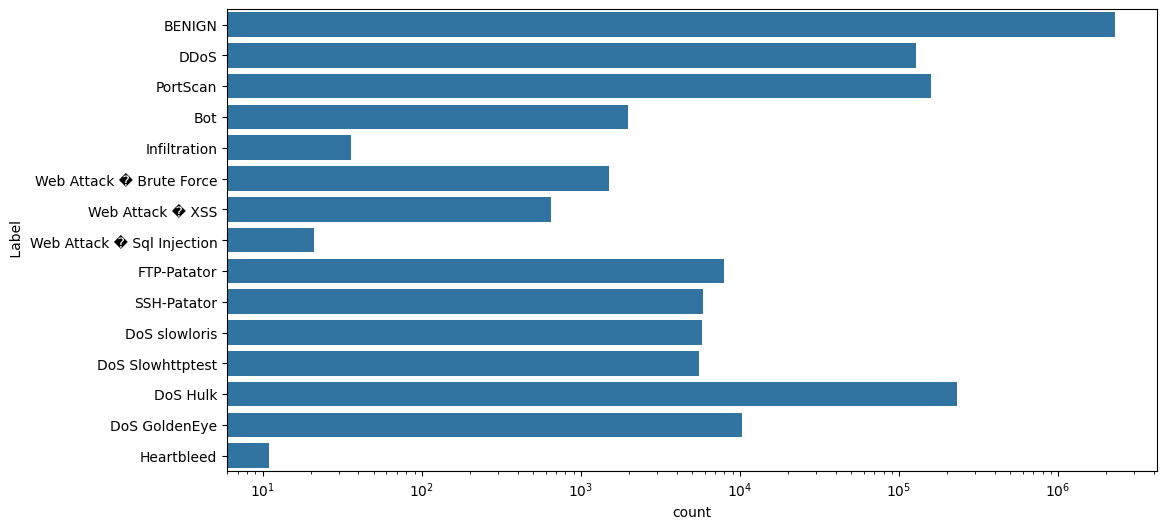

In [5]:
plt.figure(figsize=(12, 6))
plot = sns.countplot(y=df[' Label'])
plt.xscale('log')
fig = plot.get_figure()
fig.savefig('img1.png')

In [6]:
df.duplicated().sum()

308381

In [8]:
df.shape


(2830743, 79)

In [7]:
df =  df.drop_duplicates(keep="first")

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape


(2522362, 79)

In [10]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s             353
 Destination Port          0
 Bwd Avg Bytes/Bulk        0
 Fwd Avg Packets/Bulk      0
Fwd Avg Bytes/Bulk         0
                        ... 
 Bwd IAT Mean              0
Bwd IAT Total              0
 Fwd IAT Min               0
 Fwd IAT Max               0
 Label                     0
Length: 79, dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
df.shape


(2522009, 79)

In [12]:
df.isnull().sum().sort_values(ascending = False)

 Destination Port        0
 ECE Flag Count          0
 Fwd Avg Packets/Bulk    0
Fwd Avg Bytes/Bulk       0
 Fwd Header Length.1     0
                        ..
Bwd IAT Total            0
 Fwd IAT Min             0
 Fwd IAT Max             0
 Fwd IAT Std             0
 Label                   0
Length: 79, dtype: int64

In [13]:
df.shape


(2522009, 79)

In [14]:
df=df.groupby(' Label').filter(lambda x:len(x)>10000)
df[' Label'].value_counts()

BENIGN           2096134
DoS Hulk          172846
DDoS              128016
PortScan           90819
DoS GoldenEye      10286
Name:  Label, dtype: int64

In [15]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [16]:
df.shape


(2498101, 79)

In [19]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# df.reset_index(drop=True,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4840\1591906943.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [17]:
df.shape

(2498101, 79)

In [18]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(df, 0.85)
corr_features

C:\Users\hp\AppData\Local\Temp\ipykernel_6100\1360579028.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Max',
 ' Bwd IAT Mean',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [20]:
df.drop(corr_features,axis=1,inplace=True)

In [21]:
y = df[' Label']
x = df.drop([' Label'],axis=1)

In [22]:
x.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std
0,54865,3,2,12,6,6,0,0,4.000000e+06,666666.687500,...,0,0,0,0,33,-1,0.0,0.0,0,0.0
1,55054,109,1,6,6,6,6,6,1.100917e+05,18348.623047,...,0,0,0,0,29,256,0.0,0.0,0,0.0
2,55055,52,1,6,6,6,6,6,2.307692e+05,38461.539062,...,0,0,0,0,29,256,0.0,0.0,0,0.0
3,46236,34,1,6,6,6,6,6,3.529412e+05,58823.531250,...,0,0,0,0,31,329,0.0,0.0,0,0.0
4,54863,3,2,12,6,6,0,0,4.000000e+06,666666.687500,...,0,0,0,0,32,-1,0.0,0.0,0,0.0


In [23]:
y.head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name:  Label, dtype: object

In [24]:
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)
# Xn.value_counts()

In [25]:
Xn.head()
Xn.shape

(51430, 41)

In [26]:
cols = list(Xn.columns)
for col in cols:
    Xn[col] = stats.zscore(Xn[col])

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [27]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=0)

In [28]:
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

True
False


In [29]:
def plot_confusion_matrix(cm,title,cmap=None,target=None,normalize=False):

    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target is not None:
        ticks = np.arange(len(target))
        plt.xticks(ticks, target, rotation=45)
        plt.yticks(ticks, target)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    plt.savefig(title, bbox_inches='tight', dpi=300)

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Flow Bytes/s' ' Flow Packets/s' ' Bwd PSH Flags' ' Fwd URG Flags'
 ' Bwd URG Flags' 'Fwd Avg Bytes/Bulk' ' Fwd Avg Packets/Bulk'
 ' Fwd Avg Bulk Rate' ' Bwd Avg Bytes/Bulk' ' Bwd Avg Packets/Bulk'
 'Bwd Avg Bulk Rate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Flow Bytes/s' ' Flow Packets/s' ' Bwd PSH Flags' ' Fwd URG Flags'
 ' Bwd URG Flags' 'Fwd Avg Bytes/Bulk' ' Fwd Avg Packets/Bulk'
 ' Fwd Avg Bulk Rate' ' Bwd Avg Bytes/Bulk' ' Bwd Avg Packets/Bulk'
 'Bwd Avg Bulk Rate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [31]:
Logistic = LogisticRegression()
Logistic.fit(X_train, Y_train) 


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
Predict_X =  Logistic.predict(X_train)
scores = cross_val_score(Logistic, X_train, Y_train, cv=7)
accuracy = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_train, Predict_X)
classification = metrics.classification_report(Y_train, Predict_X)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9800283325463183

Model Accuracy:
 0.9813338518374489

Confusion matrix:
 [[6710   89   81  159  154]
 [   5 7197    1    2    0]
 [   5    2 7153   57    0]
 [  13    5   40 7106    1]
 [  46    0    6    6 7163]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.93      0.96      7193
         DDoS       0.99      1.00      0.99      7205
DoS GoldenEye       0.98      0.99      0.99      7217
     DoS Hulk       0.97      0.99      0.98      7165
     PortScan       0.98      0.99      0.99      7221

     accuracy                           0.98     36001
    macro avg       0.98      0.98      0.98     36001
 weighted avg       0.98      0.98      0.98     36001



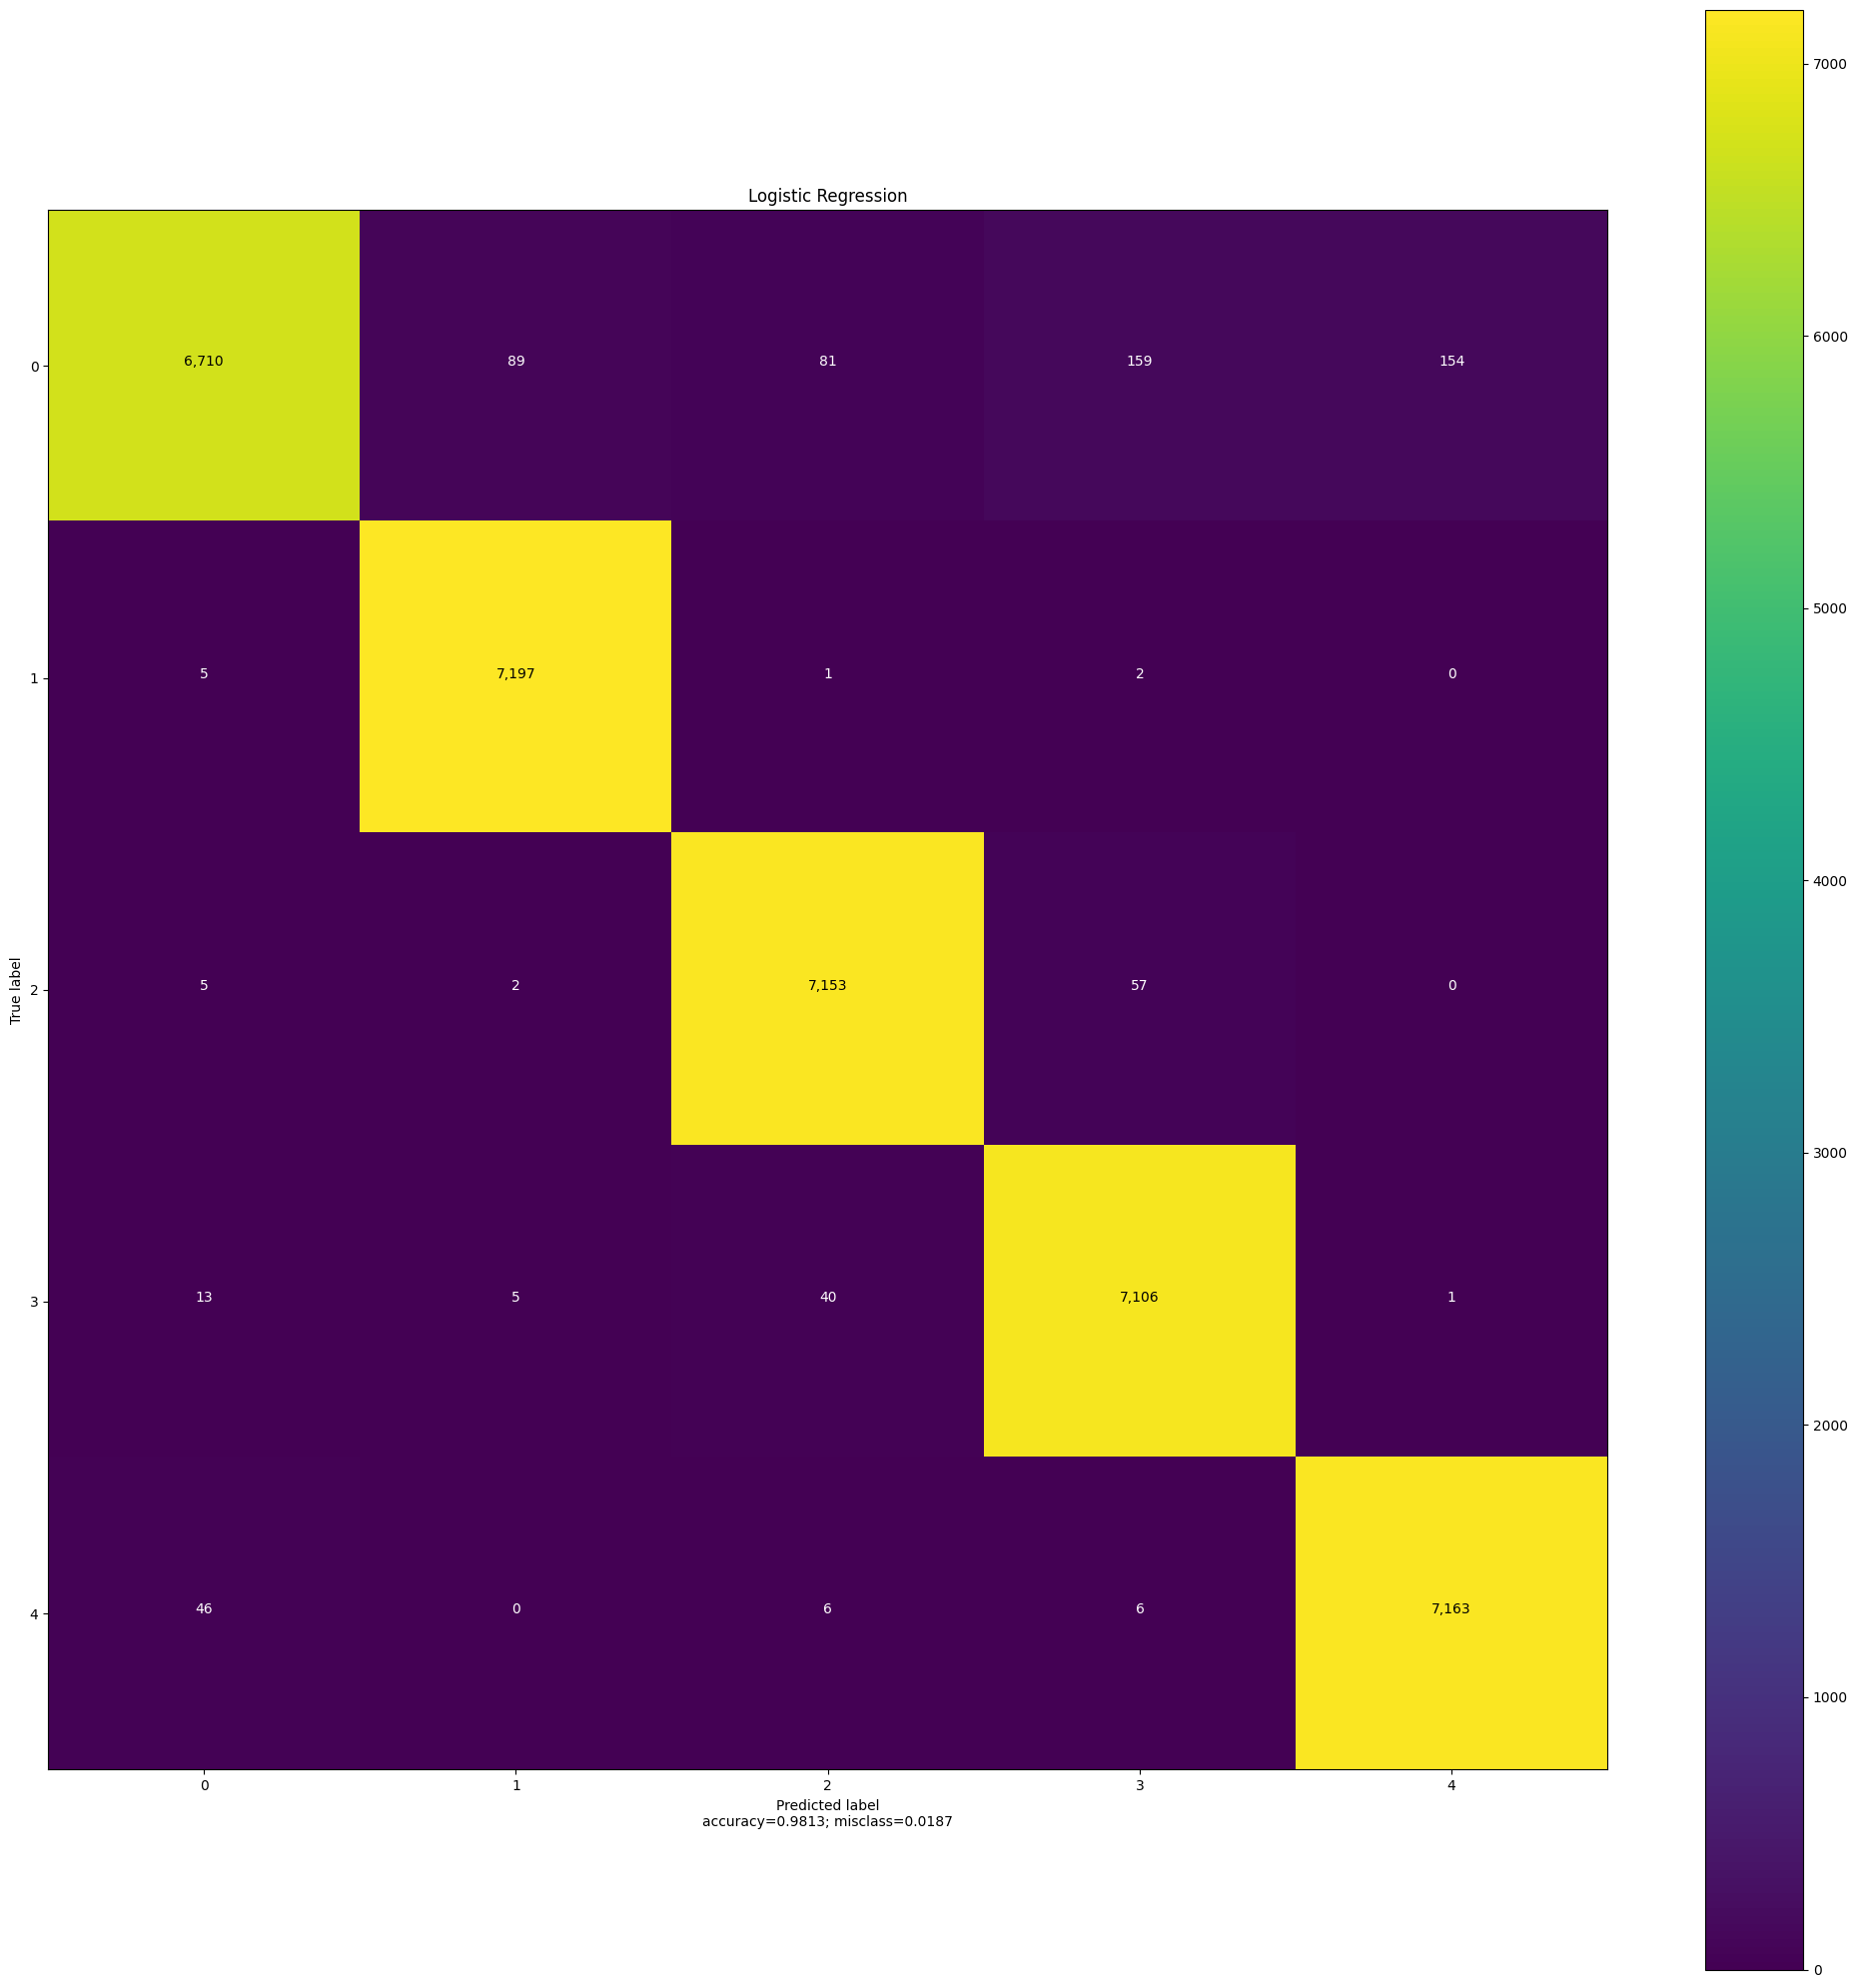

<Figure size 640x480 with 0 Axes>

In [34]:
plot_confusion_matrix(cm=confusion_matrix ,title= 'Logistic Regression')

In [35]:
decision = DecisionTreeClassifier()
decision.fit(X_train,Y_train)

DecisionTreeClassifier()

In [36]:
Predict_X =  Logistic.predict(X_train)
scores1 = cross_val_score(Logistic, X_train, Y_train, cv=7)
accuracy1 = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix1 = metrics.confusion_matrix(Y_train, Predict_X)
classification1 = metrics.classification_report(Y_train, Predict_X)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores1.mean())
print()
print ("Model Accuracy:" "\n", accuracy1)
print()
print("Confusion matrix:" "\n", confusion_matrix1)
print()
print("Classification report:" "\n", classification1) 


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9800283325463183

Model Accuracy:
 0.9813338518374489

Confusion matrix:
 [[6710   89   81  159  154]
 [   5 7197    1    2    0]
 [   5    2 7153   57    0]
 [  13    5   40 7106    1]
 [  46    0    6    6 7163]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.93      0.96      7193
         DDoS       0.99      1.00      0.99      7205
DoS GoldenEye       0.98      0.99      0.99      7217
     DoS Hulk       0.97      0.99      0.98      7165
     PortScan       0.98      0.99      0.99      7221

     accuracy                           0.98     36001
    macro avg       0.98      0.98      0.98     36001
 weighted avg       0.98      0.98      0.98     36001



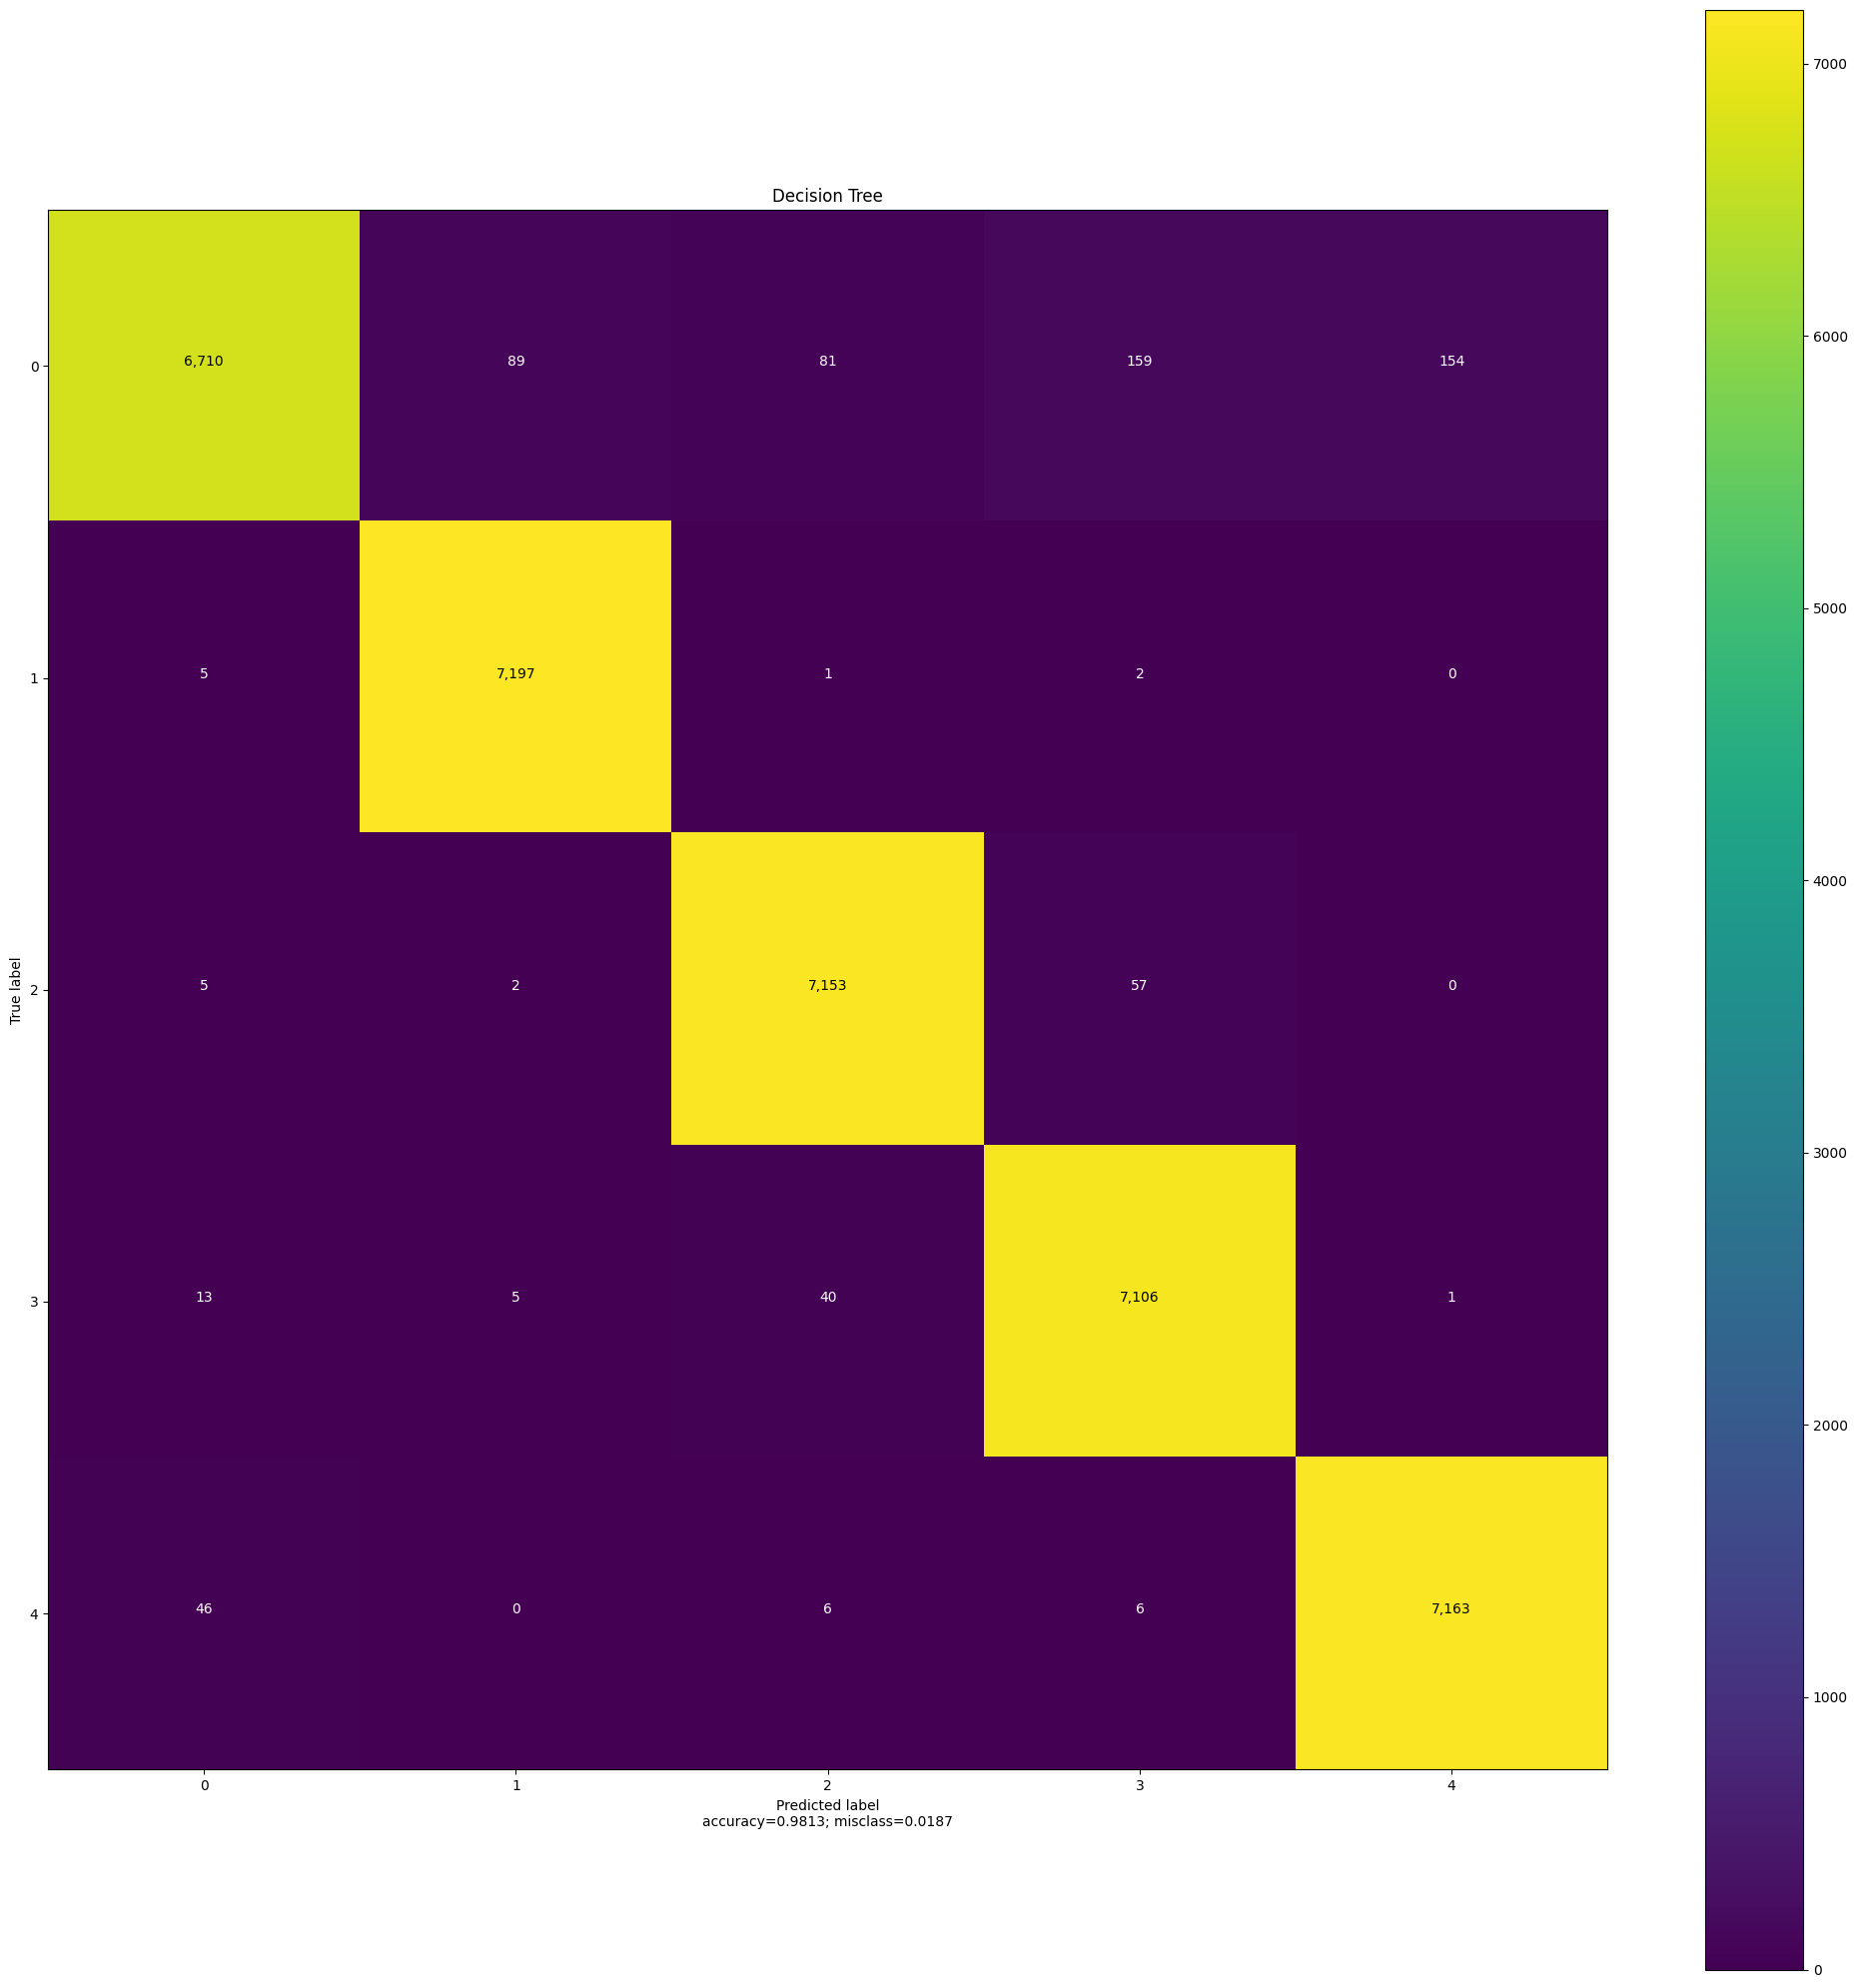

<Figure size 640x480 with 0 Axes>

In [38]:
plot_confusion_matrix(cm=confusion_matrix1 ,title= 'Decision Tree')

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC

start = time.time()
Random_Forest = RFC(max_depth=40) 
Random_Forest.fit(X_train, Y_train) 


filename = 'random_model1.pkl'
pickle.dump(Random_Forest, open(filename, 'wb')) 

In [40]:
importance = Random_Forest.feature_importances_

In [41]:
importance 
np.argsort(importance)[::-1]

array([ 4, 25, 24,  2,  1,  3,  9, 16,  8, 14, 20,  0, 15,  6, 11, 12,  7,
       17,  5, 10, 21, 23, 18, 27, 26, 28, 22, 29, 13, 19], dtype=int64)

In [ ]:
4, 26, 27,  3,  2, 10, 11,  1, 17,0,9

In [42]:
from sklearn import metrics
Predict_X =  Random_Forest.predict(X_train)
scores2 = cross_val_score(Random_Forest, X_train, Y_train, cv=7)
accuracy2 = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix2 = metrics.confusion_matrix(Y_train, Predict_X)
classification2 = metrics.classification_report(Y_train, Predict_X)




In [30]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy2)
print()
print("Confusion matrix:" "\n", confusion_matrix2)
print()
print("Classification report:" "\n", classification2) 
print()


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.7221638655462185

Model Accuracy:
 1.0

Confusion matrix:
 [[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 9 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 7]]

Classification report:
                             precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00         8
                       Bot       1.00      1.00      1.00         9
                      DDoS       1.00      1.00      1.00         8
             DoS GoldenEye       1.00      1

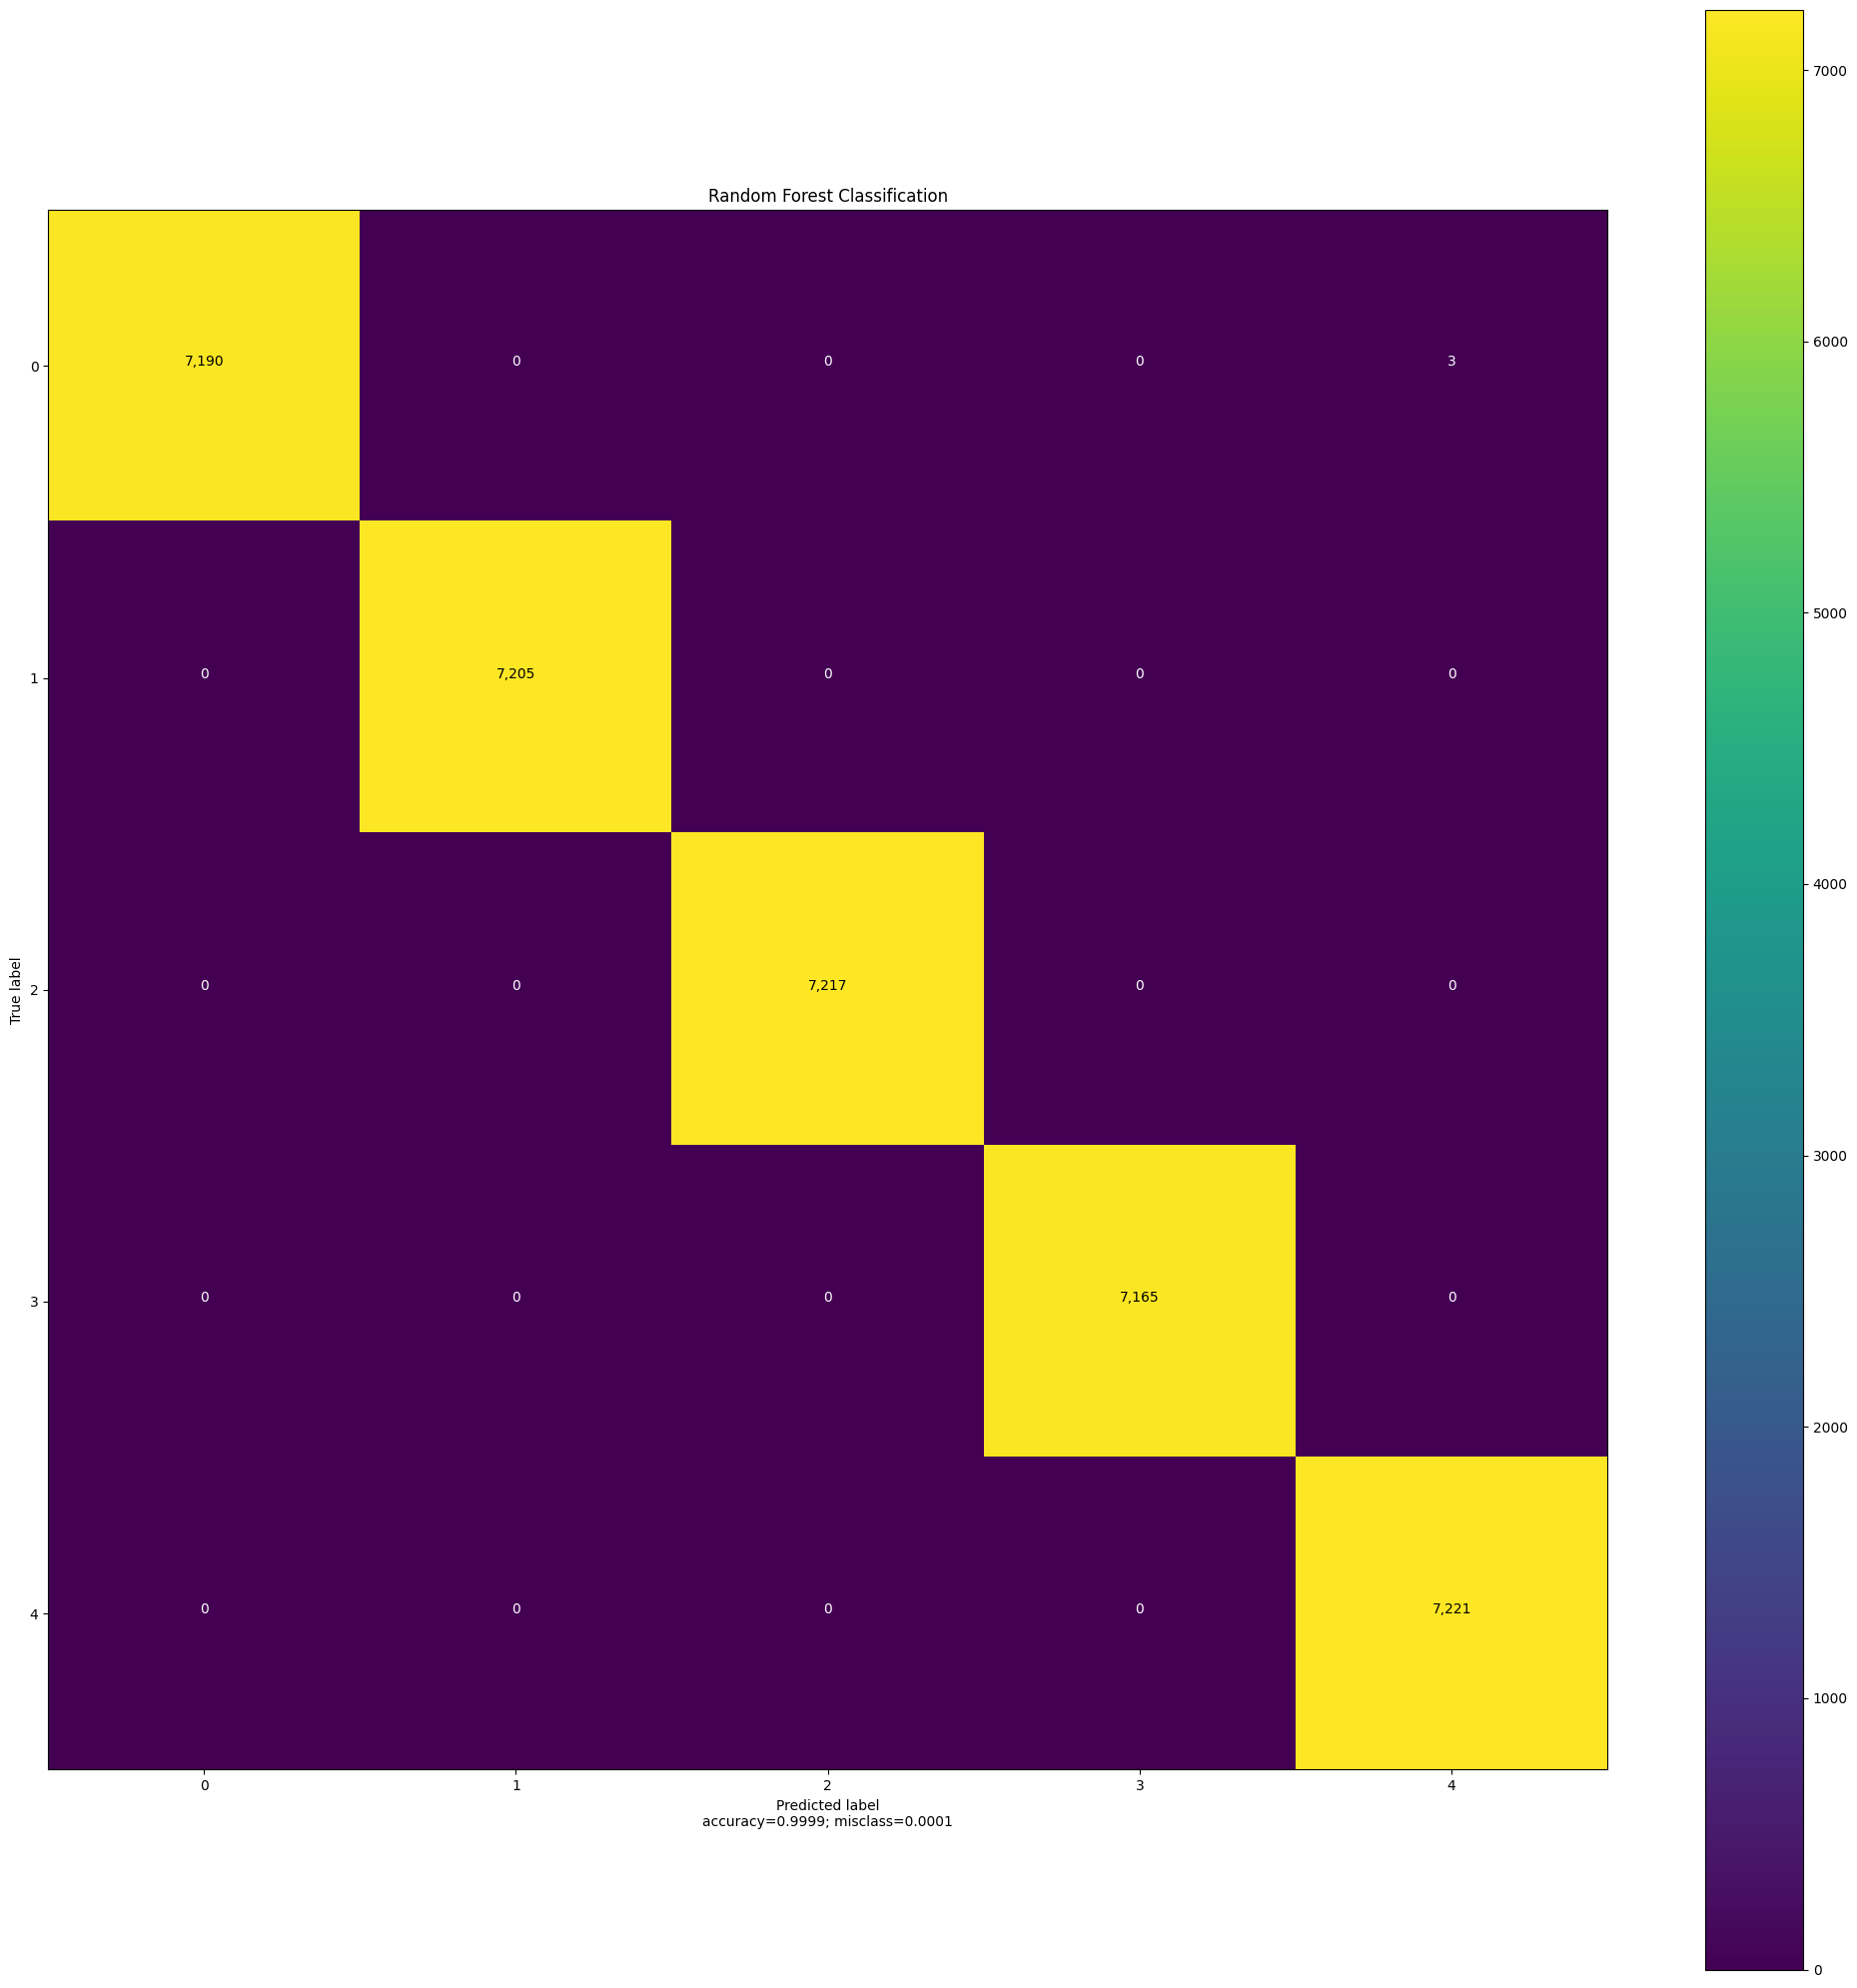

<Figure size 640x480 with 0 Axes>

In [43]:
plot_confusion_matrix(cm=confusion_matrix2 ,title= 'Random Forest Classification')

In [44]:
Predict_X =  Random_Forest.predict(X_test)
scores3 = cross_val_score(Random_Forest, X_test, Y_test, cv=5)
accuracy3 = metrics.accuracy_score(Y_test,Predict_X)
confusion_matrix3 = metrics.confusion_matrix(Y_test, Predict_X)
classification3 = metrics.classification_report(Y_test, Predict_X)


In [45]:
print()
print('--------------------------- Results --------------------------------')
print()
print()
print ("Model Accuracy:" "\n", accuracy3)
print()
print("Confusion matrix:" "\n", confusion_matrix3)
print()
print("Classification report:" "\n", classification3) 
print()


--------------------------- Results --------------------------------


Model Accuracy:
 0.9988981787542939

Confusion matrix:
 [[3088    0    0    2    3]
 [   3 3078    0    0    0]
 [   4    0 3064    1    0]
 [   2    0    1 3118    0]
 [   0    0    0    1 3064]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       1.00      1.00      1.00      3069
     DoS Hulk       1.00      1.00      1.00      3121
     PortScan       1.00      1.00      1.00      3065

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429




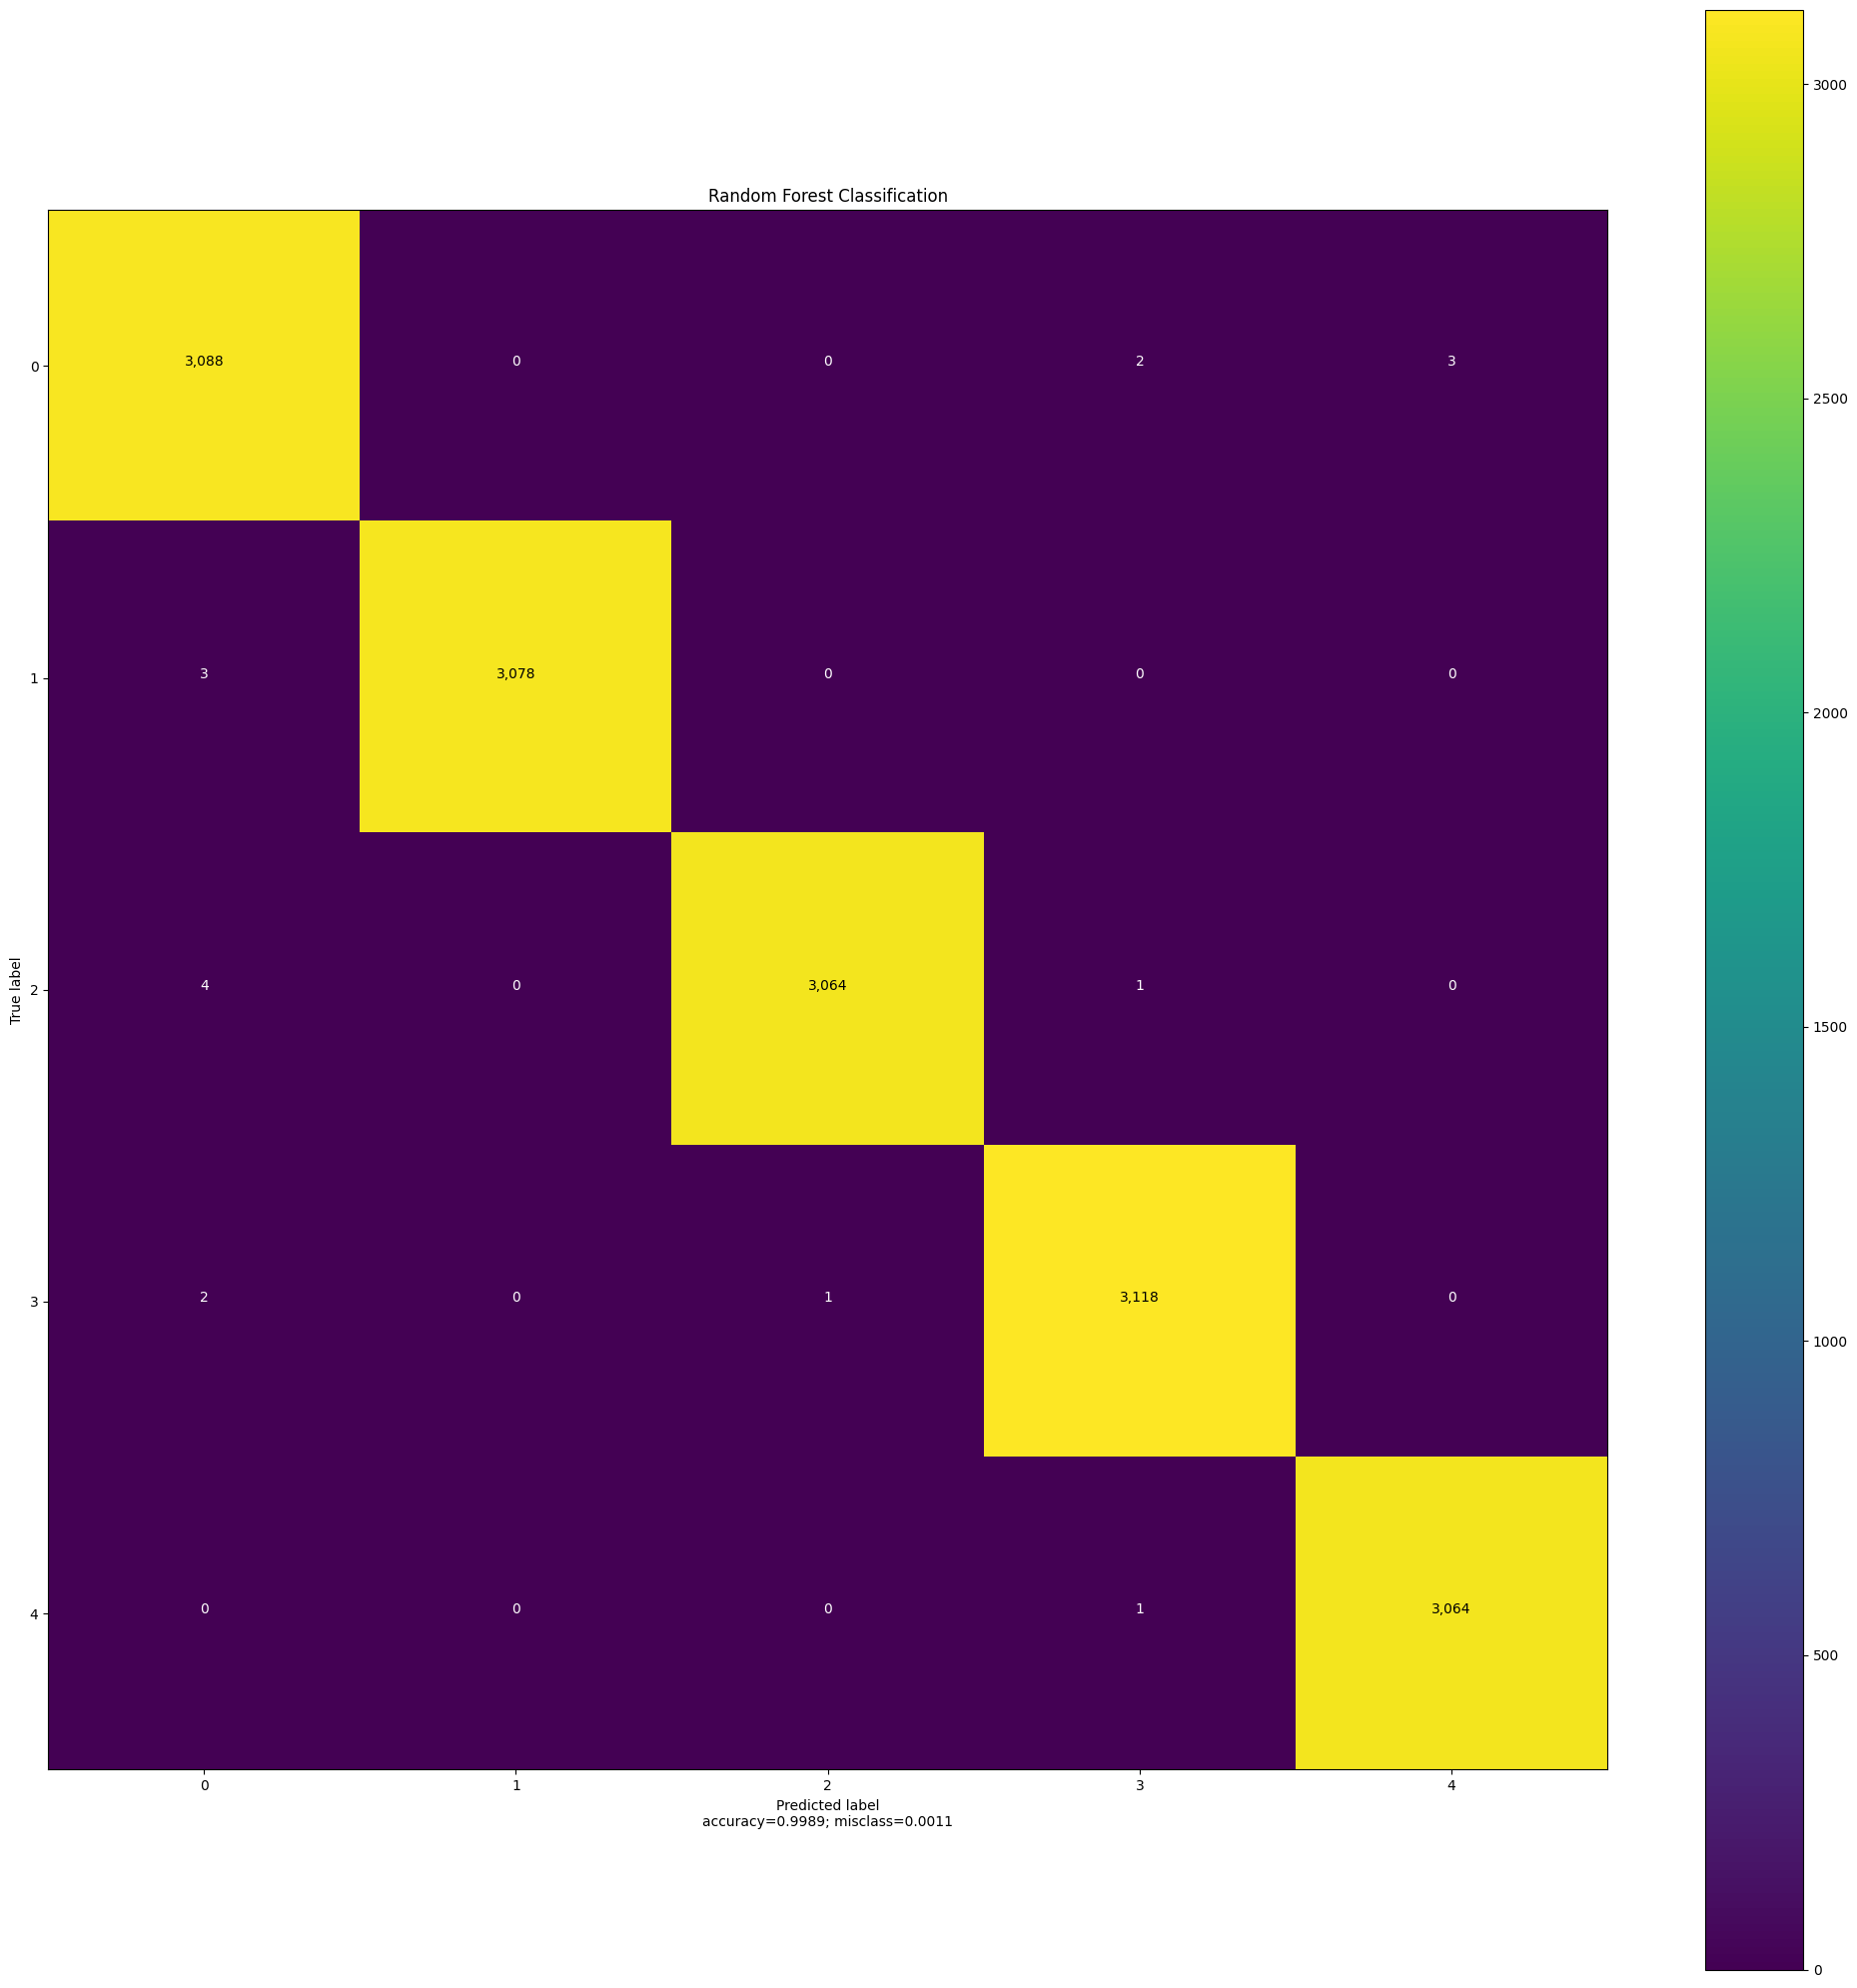

<Figure size 640x480 with 0 Axes>

In [46]:
plot_confusion_matrix(cm=confusion_matrix3 ,title= 'Random Forest Classification')

In [47]:
pd.DataFrame(X_test).to_csv('sample_data.csv', index=False)

In [ ]:

def process_csv_with_delay(sampled_data, model):
    for _, row in sampled_data.iterrows():
        prediction = model.predict([row])  # Assuming model expects a 2D array
        # Print the result
        if prediction[0] != 'BENIGN':
            print(f"Your agent is under attack: Attack Type : {prediction[0]}")
        else:
            print("No attack detected")
            
        sleep(5)

    
X_1 = pd.DataFrame(X_train)
with open('random_model1.pkl', 'rb') as f:
    model = pickle.load(f)
process_csv_with_delay(X_1, model)

In [48]:
accuracy = {'Logistic_Regression':0.992880769031991,'Random_Forest':1,'Decision Tree': 0.9998}

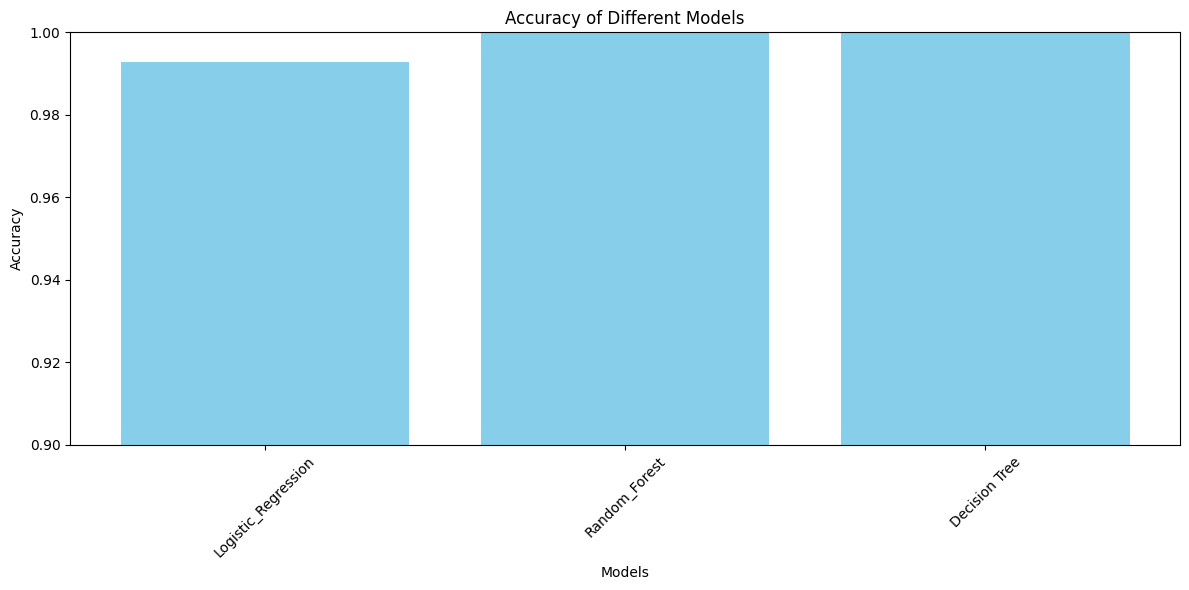

In [49]:
models = list(accuracy.keys())
accuracies = list(accuracy.values())

# Plot
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.90, 1)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()